# Running the optimizer with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import Himmelblau

himmelblau = Himmelblau()

In [2]:
boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=himmelblau.dofs, 
                                             dets=[],
                                             bounds=himmelblau.bounds, 
                                             db=db, 
                                             experiment=himmelblau,
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


Transient Scan ID: 1     Time: 2023-04-24 20:16:45
Persistent Unique Scan ID: '98c36157-a8f4-4c93-9b14-28a1b8a11410'


New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:16:46.1 |      3.931 |      1.064 |
|         2 | 20:16:46.1 |      2.681 |      2.176 |
|         3 | 20:16:46.1 |      1.431 |      3.287 |
|         4 | 20:16:46.1 |     -4.819 |      4.398 |
|         5 | 20:16:46.1 |     -3.569 |     -0.047 |
|         6 | 20:16:46.1 |     -2.319 |     -1.158 |
|         7 | 20:16:46.1 |     -1.069 |     -2.269 |
|         8 | 20:16:46.1 |      0.181 |     -4.491 |
+-----------+------------+------------+------------+
generator list_scan ['98c36157'] (scan num: 1)





         x1        x2     fitness
0  3.931392  1.064393  -34.219844
1  2.681392  2.175505   -2.843595
2  1.431392  3.286616  -59.473318
3 -4.818608  4.397727 -332.686404
4 -3.568608 -0.046718 -114.499521
5 -2.318608 -1.157829 -109.643102
6 -1.068608 -2.268940 -155.593971
7  0.181392 -4.491162 -417.231789


('98c36157-a8f4-4c93-9b14-28a1b8a11410',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer:

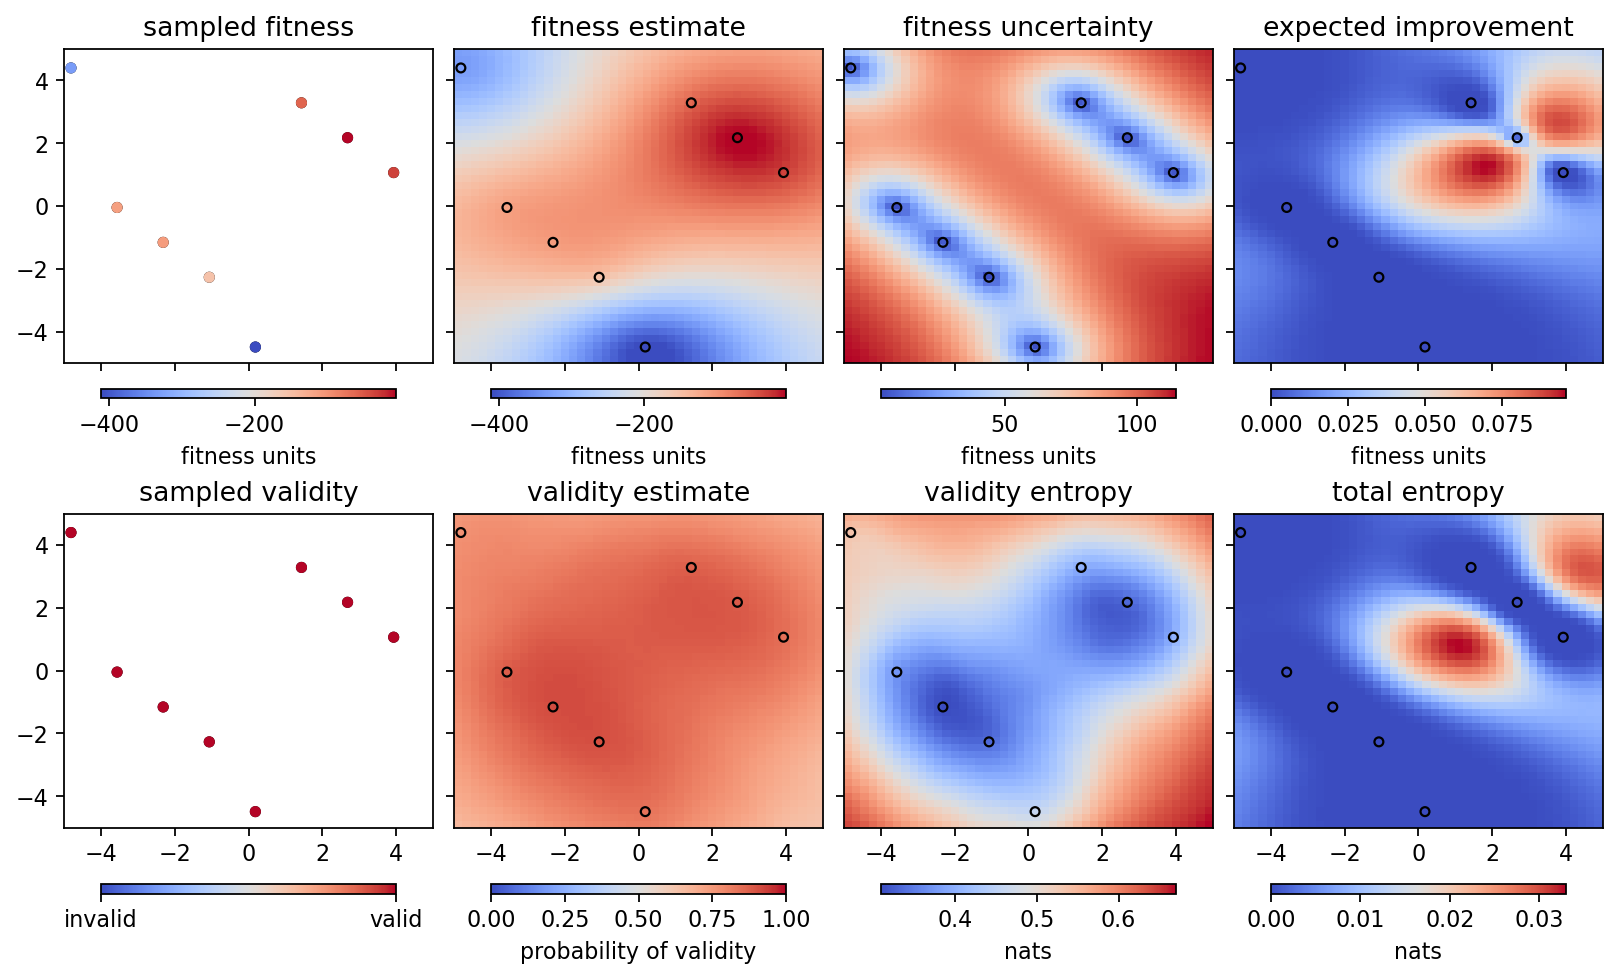

In [3]:
boa.plot_state(gridded=True)

Now let's try the "EI" strategy to sample where we expect the largest improvement in the fitness:

learning with strategy "eI" ...




Transient Scan ID: 2     Time: 2023-04-24 20:16:59
Persistent Unique Scan ID: '95d870a5-7656-4a3b-b03c-ac556bda0619'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:16:59.5 |     -4.989 |     -2.519 |
|         2 | 20:16:59.5 |      1.712 |      1.086 |
|         3 | 20:16:59.5 |      3.003 |      1.966 |
|         4 | 20:16:59.5 |      3.807 |      2.931 |
+-----------+------------+------------+------------+
generator list_scan ['95d870a5'] (scan num: 2)





          x1        x2     fitness
8  -4.989498 -2.519431 -161.237443
9   1.712136  1.085506  -65.651792
10  3.002980  1.965967   -0.017683
11  3.806831  2.931311  -70.412135


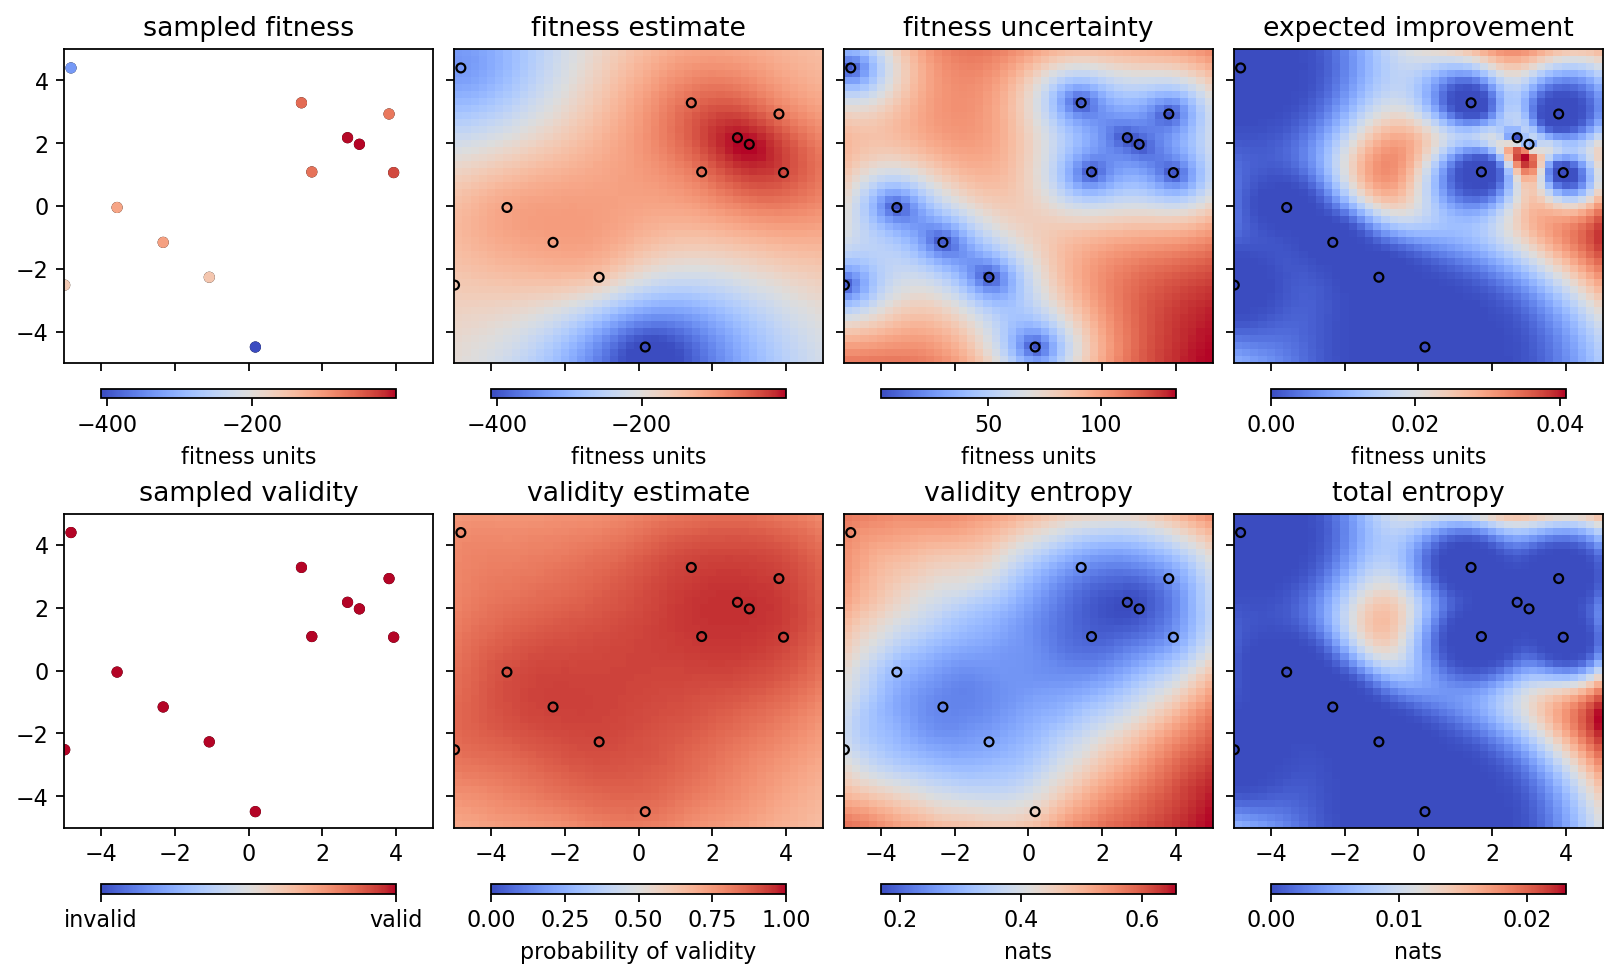

In [4]:
RE(boa.learn(strategy='eI', n_iter=1, n_per_iter=4))
boa.plot_state(gridded=True)

Let's learn a bit more, using the "GIBBON" framework to investigate points that are likely to tell us about the optimum. Running two iterations with four points per iteration:

learning with strategy "eGIBBON" ...




Transient Scan ID: 3     Time: 2023-04-24 20:17:13
Persistent Unique Scan ID: '769a02c1-d76a-4c45-ae65-04ba876c0697'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:13.4 |      2.151 |      4.941 |
|         2 | 20:17:13.4 |     -0.935 |      1.578 |
|         3 | 20:17:13.4 |      2.883 |      1.849 |
|         4 | 20:17:13.4 |      4.915 |     -1.488 |
+-----------+------------+------------+------------+
generator list_scan ['769a02c1'] (scan num: 3)





          x1        x2     fitness
12  2.150949  4.940734 -384.716835
13 -0.934912  1.577853 -102.720973
14  2.882995  1.848574   -1.194897
15  4.915456 -1.487652 -136.300172




Transient Scan ID: 4     Time: 2023-04-24 20:17:18
Persistent Unique Scan ID: '373333ce-d7d3-4c35-bbb1-ac2b4ec736d2'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:18.8 |      4.888 |     -4.733 |
|         2 | 20:17:18.8 |      4.885 |      1.866 |
|         3 | 20:17:18.8 |      2.923 |     -0.153 |
|         4 | 20:17:18.8 |      1.053 |      2.228 |
+-----------+------------+------------+------------+
generator list_scan ['373333ce'] (scan num: 4)





          x1        x2     fitness
16  4.887975 -4.732655 -478.101342
17  4.884779  1.866013 -218.754917
18  2.922735 -0.153145  -23.249481
19  1.053048  2.228004  -59.689082




Transient Scan ID: 5     Time: 2023-04-24 20:17:24
Persistent Unique Scan ID: 'df3f5b14-1237-485e-9151-196bd25dfafd'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:24.4 |     -1.363 |      4.177 |
|         2 | 20:17:24.4 |      3.163 |      0.968 |
|         3 | 20:17:24.4 |      0.435 |     -0.447 |
|         4 | 20:17:24.4 |     -4.441 |     -4.992 |
+-----------+------------+------------+------------+
generator list_scan ['df3f5b14'] (scan num: 5)





          x1        x2     fitness
20 -1.363464  4.176712 -107.116635
21  3.162612  0.967735   -8.415995
22  0.434827 -0.446946 -167.258135
23 -4.441494 -4.992401 -195.726030




Transient Scan ID: 6     Time: 2023-04-24 20:17:29
Persistent Unique Scan ID: '67f02a50-a524-471c-a108-2555242f1439'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:29.7 |     -2.669 |      2.155 |
|         2 | 20:17:29.7 |      2.976 |      2.382 |
|         3 | 20:17:29.7 |      3.381 |      1.408 |
|         4 | 20:17:29.7 |      3.691 |      0.283 |
+-----------+------------+------------+------------+
generator list_scan ['67f02a50'] (scan num: 6)





          x1        x2    fitness
24 -2.668632  2.154969 -28.218259
25  2.976219  2.381631  -2.774534
26  3.380595  1.407924  -6.052441
27  3.690738  0.283191 -18.864374


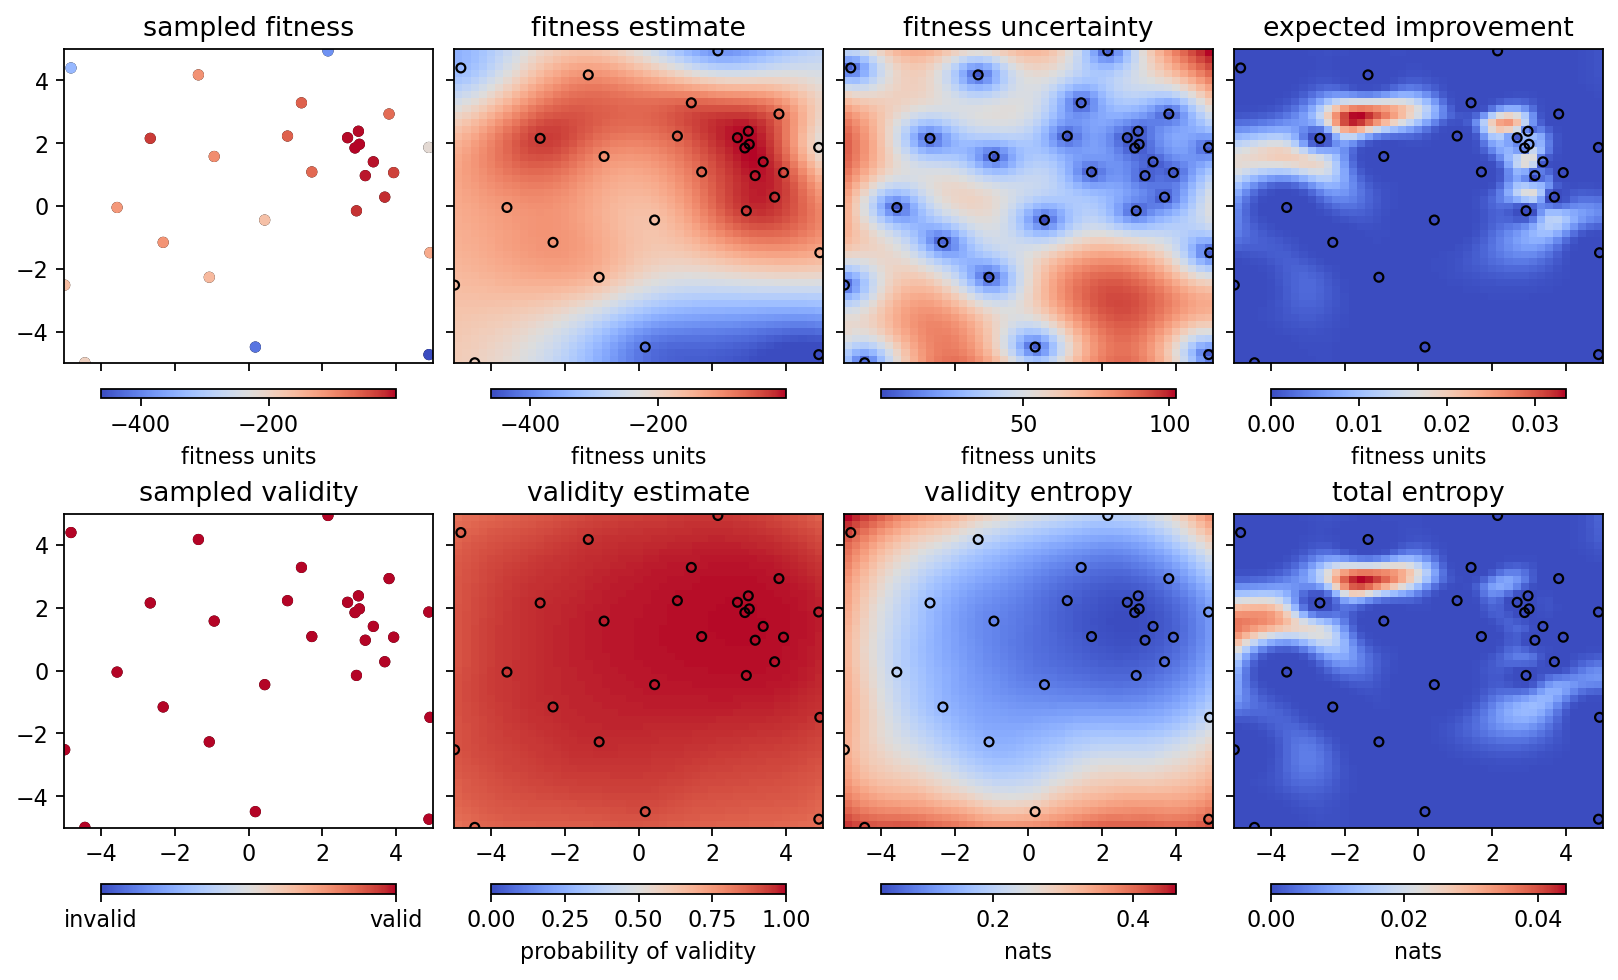

In [5]:
RE(boa.learn(strategy='eGIBBON', n_iter=4, n_per_iter=4))
boa.plot_state(gridded=True)

Eventually, we reach a point of saturation where no more improvement takes place:

learning with strategy "eGIBBON" ...




Transient Scan ID: 7     Time: 2023-04-24 20:17:43
Persistent Unique Scan ID: 'ad566b68-fc81-4b1a-8e7e-faf1fe17ca77'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:43.4 |     -2.638 |      1.207 |
|         2 | 20:17:43.5 |     -4.935 |      1.196 |
|         3 | 20:17:43.5 |     -1.723 |      2.913 |
|         4 | 20:17:43.5 |      2.425 |      2.524 |
+-----------+------------+------------+------------+
generator list_scan ['ad566b68'] (scan num: 7)





          x1        x2     fitness
28 -2.638394  1.206918  -74.960912
29 -4.934687  1.195641 -321.966562
30 -1.722618  2.912667  -26.270712
31  2.424709  2.523515   -9.960087




Transient Scan ID: 8     Time: 2023-04-24 20:17:49
Persistent Unique Scan ID: '5798cedd-5fdc-422f-a7de-74c612c247cf'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:49.4 |      4.953 |      4.837 |
|         2 | 20:17:49.4 |     -0.323 |      3.103 |
|         3 | 20:17:49.4 |     -2.592 |      3.112 |
|         4 | 20:17:49.4 |      3.461 |     -1.004 |
+-----------+------------+------------+------------+
generator list_scan ['5798cedd'] (scan num: 8)





          x1        x2     fitness
32  4.953200  4.836733 -793.193090
33 -0.323044  3.103295  -66.044748
34 -2.592085  3.111533   -1.375891
35  3.461230 -1.004271   -6.402539




Transient Scan ID: 9     Time: 2023-04-24 20:17:55
Persistent Unique Scan ID: '071b41e4-6cd3-4a64-8577-157633645ed7'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:17:55.6 |      3.763 |     -0.729 |
|         2 | 20:17:55.6 |      2.445 |     -1.290 |
|         3 | 20:17:55.6 |     -3.045 |     -3.113 |
|         4 | 20:17:55.6 |     -2.375 |      2.970 |
+-----------+------------+------------+------------+
generator list_scan ['071b41e4'] (scan num: 9)





          x1        x2    fitness
36  3.763094 -0.728871 -13.235199
37  2.444804 -1.289920 -48.211734
38 -3.045382 -3.113005 -23.538320
39 -2.375134  2.969908  -6.014292




Transient Scan ID: 10     Time: 2023-04-24 20:18:01
Persistent Unique Scan ID: 'ae011d8a-6ba2-45e9-a64f-0eb3dd4b4ae8'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:18:01.6 |     -2.768 |      4.691 |
|         2 | 20:18:01.6 |     -2.344 |     -4.920 |
|         3 | 20:18:01.6 |     -3.155 |     -2.229 |
|         4 | 20:18:01.6 |     -3.914 |     -3.622 |
+-----------+------------+------------+------------+
generator list_scan ['ae011d8a'] (scan num: 10)





          x1        x2     fitness
40 -2.767625  4.691333 -151.666956
41 -2.343756 -4.919678 -329.515547
42 -3.154551 -2.229326  -37.626845
43 -3.914181 -3.621910   -5.346307




Transient Scan ID: 11     Time: 2023-04-24 20:18:07
Persistent Unique Scan ID: '83239ed9-ec4d-4dd8-8969-e241f1f7cb44'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:18:07.4 |     -3.799 |     -3.007 |
|         2 | 20:18:07.4 |      3.222 |     -1.999 |
|         3 | 20:18:07.4 |      4.776 |      0.073 |
|         4 | 20:18:07.4 |     -0.308 |      4.867 |
+-----------+------------+------------+------------+
generator list_scan ['83239ed9'] (scan num: 11)





          x1        x2     fitness
44 -3.798923 -3.006954   -3.268074
45  3.222096 -1.999078   -6.897299
46  4.775901  0.073441 -146.120604
47 -0.307985  4.867264 -304.834755




Transient Scan ID: 12     Time: 2023-04-24 20:18:13
Persistent Unique Scan ID: '8f97c6a2-f454-4b03-a5f6-44c434ef0b4d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:18:13.5 |      3.510 |      2.090 |
|         2 | 20:18:13.5 |      3.483 |     -1.553 |
|         3 | 20:18:13.5 |      2.620 |     -2.118 |
|         4 | 20:18:13.5 |     -3.537 |     -3.459 |
+-----------+------------+------------+------------+
generator list_scan ['8f97c6a2'] (scan num: 12)





          x1        x2    fitness
48  3.509536  2.090238 -12.380186
49  3.483027 -1.553256  -1.397525
50  2.619597 -2.118105 -39.146461
51 -3.537295 -3.458504  -5.814738




Transient Scan ID: 13     Time: 2023-04-24 20:18:19
Persistent Unique Scan ID: '6fda69a4-2e43-4dd1-812d-72e88802cef1'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:18:19.4 |     -2.910 |      2.618 |
|         2 | 20:18:19.4 |     -2.179 |      3.567 |
|         3 | 20:18:19.4 |      3.210 |     -1.596 |
|         4 | 20:18:19.4 |      2.600 |     -3.598 |
+-----------+------------+------------+------------+
generator list_scan ['6fda69a4'] (scan num: 13)





          x1        x2     fitness
52 -2.910045  2.618359   -9.335920
53 -2.178635  3.567149  -19.790249
54  3.209995 -1.595908   -6.797796
55  2.599852 -3.598268 -134.508239




Transient Scan ID: 14     Time: 2023-04-24 20:18:25
Persistent Unique Scan ID: '0f5f9a7c-40eb-403b-9544-4b3868d5681b'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 20:18:25.4 |      3.643 |     -2.254 |
|         2 | 20:18:25.4 |      1.297 |     -2.174 |
|         3 | 20:18:25.4 |     -1.442 |     -0.029 |
|         4 | 20:18:25.4 |      1.907 |      2.178 |
+-----------+------------+------------+------------+
generator list_scan ['0f5f9a7c'] (scan num: 14)





          x1        x2     fitness
56  3.643384 -2.253699   -2.967583
57  1.296509 -2.173952 -133.044808
58 -1.441528 -0.028579 -151.358406
59  1.906804  2.178172  -27.015454


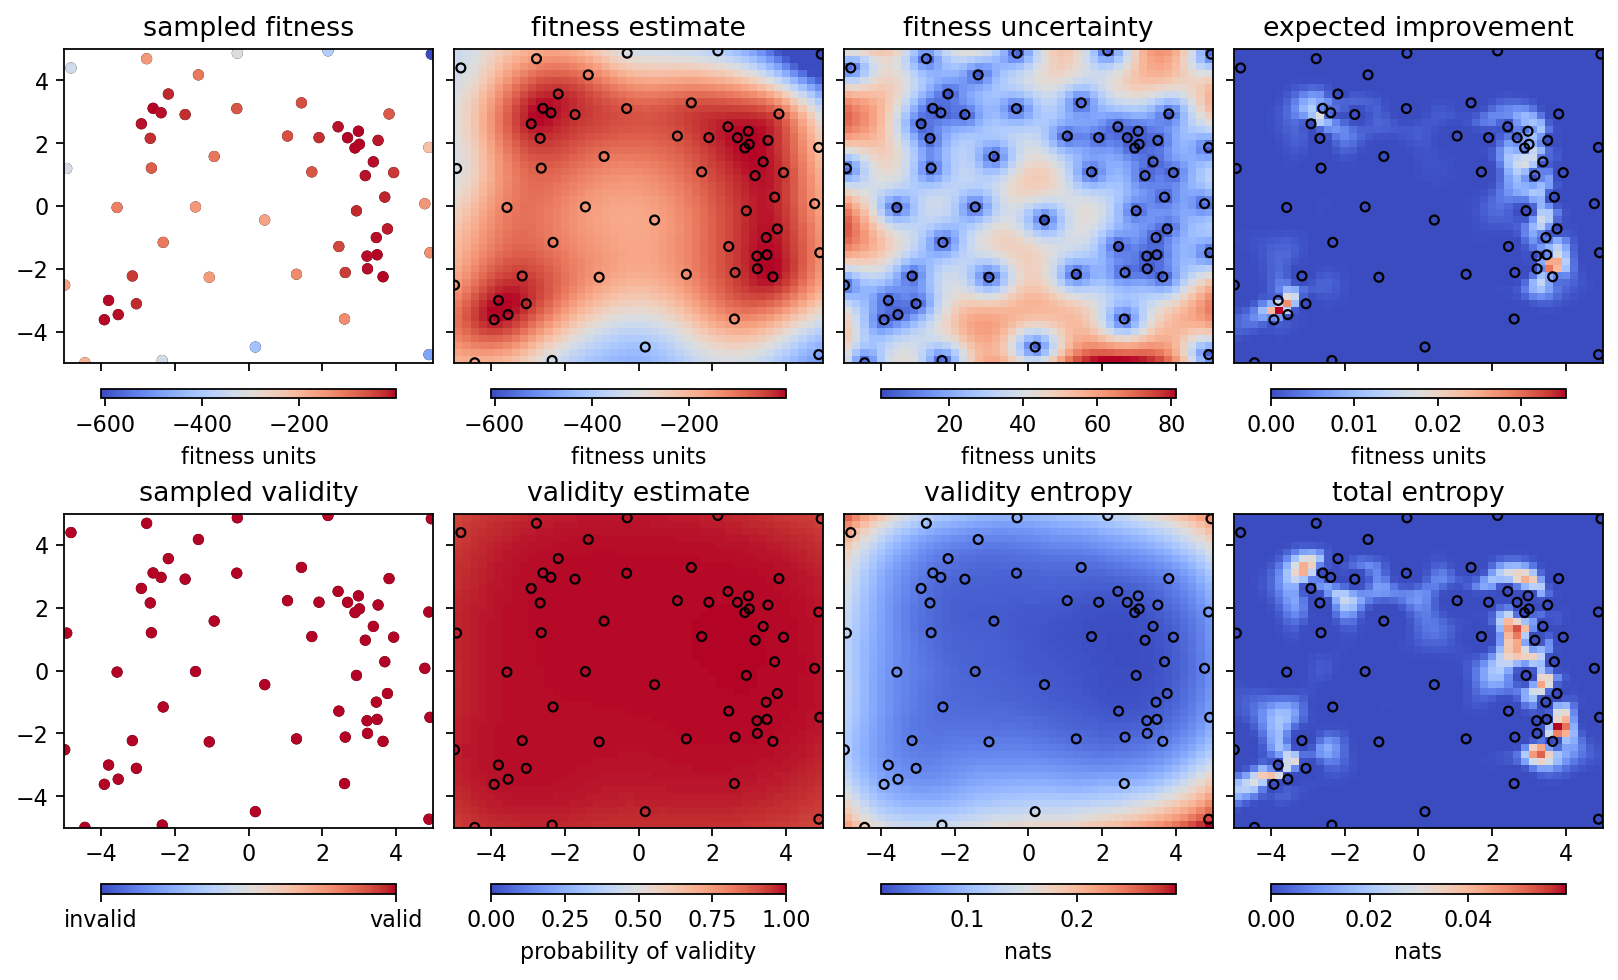

In [6]:
RE(boa.learn(strategy='eGIBBON', n_iter=8, n_per_iter=4))
boa.plot_state(gridded=True)